<a href="https://colab.research.google.com/github/nicolez9911/colab/blob/main/AdvML_L2S2_N1_Application_Perceptron_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06_EX_01 Application of a Perceptron - MNIST Classification

This exercise notebook focuses on taking the Perceptron implementation on a spin.

We will use our implementation of the Perceptron class and apply it to a binary problem selection of the


### Module Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

print("Modules imported.")

Modules imported.


## 1. Perceptron class

We will re-use the Perceptron calass from `04_EX_01`.

The class is capable of doing binary classification and provides of the following methods:

* fit: train the Perceptron
* net_input: calculate the net_input
* predict: make a prediction based on a sample input

Note: A single perceptron class is only capable of binary classification. In our case we have hardwired the classes as
      `-1` and `1`. If you want to make use of the Perceptron class for a new dataset you have to map the target value
      to these two classes.

In [2]:
import numpy.random

class Perceptron(object):

    """Perceptron binary classifier.

    Parameters
    -----------
    eta : float
       Learning rate (value between 0.0 and 1.0)
    epochs  : int
       Number of passes over the training set

    Attributes
    -----------
    w_  : 1d-array
       Weights after fitting.
    errors_   : list
       Number of updates (triggered by prediction != target)

    """

    def __init__(self, eta=0.01, epochs=10, random_state=1):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data; i.e. train the Perceptron

        Parameters
        -----------
        X : dataframe with shape - [n_samples, n_features]
          feature vectors, where n_samples is the number of samples
          in the data set, n_features is the number of features
        y : dataframe with shape = [n_samples].
            1 target value per sample (the label).

        Returns
        -----------
        self : object

        """

        # this initialize the weights
        rgen = numpy.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        # this will be used to store the number of updates per epoch
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, x):
        """Calculate net input"""
        net_input = sum(t[0] * t[1] for t in zip(x, self.w_[1:])) + self.w_[0]
        return net_input

    def predict(self, x):
        """Predict based on computing the net input and the threshold function"""
        net_input = self.net_input(x)
        if net_input >= 0.0:
            prediction = 1
        elif net_input < 0.0:
            prediction = -1
        return prediction





### MNIST Dataset

In order to start testing our Perceptron implementation we will move to a different and more realistially sized MNIST dataset.

We have already used the MNNIST dataset in the last semester when we started to familiarize us with the Machine Learning workflow.

"MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image." (source: http://yann.lecun.com/exdb/mnist/)

To save you some time the following cell contains code to download and sort the dataset.

In [3]:
# Download and sort the dataset

# Sorts the dataset by target (i.e the numbers 0-9). Sorts only the first 60000 entries (the training set).
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]


# Download and sort the dataset
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]


print(f"The shape of the target dataset is {mnist.target.shape}")
print(f"The shape of the sample dataset is {mnist.data.shape}")


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


The shape of the target dataset is (70000,)
The shape of the sample dataset is (70000, 784)


## Exercise 1: Create a Binary Training Set

In order to start training with our binary classification implementation of the Perceptron we need to select a part of the MNIST dataset consisting of only two digits.

As a first exercise create an input `X` holding `10000` samples and a target vector `y` holding `10000` labels based on selection from the loaded and sorted MNIST data from the previous cell.

**Note**: Since the implementation of our Perceptron is binary it only will correctly work if we use the target values `-1` and `1`. That means you have to map `0` and `9` to `-1` and `1` in the training data.

In [13]:
# Use this cell to create the two inputs X and y holding 10000 binary samples for the digits 0 and 9.

from sklearn.utils import shuffle


# Select 5000 values for 0 and 9 each by manually checking the boundaries or by checking for target value.
mnist_0_target = mnist.target[0:5000]
mnist_0_data = mnist.data[0:5000]
mnist_9_target = mnist.target[6000:11000]
mnist_9_data = mnist.data[6000:11000]
mnist_bin_0_9_data = np.concatenate((mnist_0_data, mnist_9_data))
mnist_bin_0_9_target = np.concatenate((mnist_0_target, mnist_9_target))
mnist_bin_0_9_target = np.where(mnist_bin_0_9_target == 0, -1, 1)

# Shuffle should be something that the students have to identify as an element that impacts the learning
X, y = shuffle(mnist_bin_0_9_data, mnist_bin_0_9_target)
#X = mnist_bin_0_9_data
#y = mnist_bin_0_9_target


print(f"The input X contains {len(X)} samples.")
print(f"The target vector y contains {len(y)} samples.")

The input X contains 10000 samples.
The target vector y contains 10000 samples.


## Train Perceptron

After you have created a binary dataset with the input `X` and target `y` you should be able to use the cell below in order to fit the Perceptron and plot the progress.

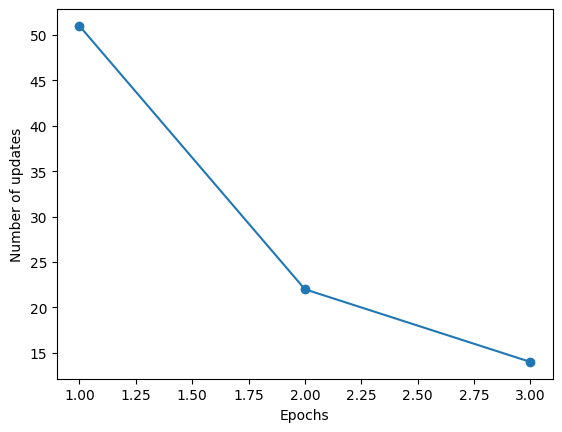

In [14]:
ppn = Perceptron(eta=0.0001, epochs=3)
ppn.fit(X,y)


# Plot number of epochs versus number of updates (i.e. errors, false classifications).
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()



## Exercise 2: Test Trained Model With Samples

After completing the training we can start to test how well our implemented perceptron is able to distinguish the handwritten digits `0` and `9`.


Use the predict method implemented below to test your trained model with samples.
If you call the predict method multple times with different input samples it will render the results every 2 seconds in the output.

1. Try to test the Perceptron with a variety of samples for `0` and `9`
2. What happens if we test with other digits?
3. Try to identify samples for the digits `0` and `9` where the classification fails

In [15]:
%matplotlib inline

from IPython.display import clear_output
from time import sleep
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def predict(index):
    some_digit = mnist.data[index]
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()
    prediction = ppn.predict(mnist.data[index])
    target = mnist.target[index]
    print(f"Target {target}")
    print(f"Prediction {prediction}")
    sleep(2.0)
    clear_output(wait=True)




In [ ]:
# Use this cell to render the output:
# 1:) Try to sample with a variety of different inputs
# 2:) Try to identify samples with wrong outputs.


## Evaluate Trained Model

Calculate precision based on using the `accuracy_score` method imported in the cell below.


* Evaluate the precision on the `training set` (entries 0-60k).
* Evaluate the precision on `the test` (entries 60001 - 70k) set by creating a subset just consisting of `0`, `9` entries.


In [ ]:
# Implement the calculation based on the training data set.

from sklearn.metrics import accuracy_score

y_pred = []
y_true = []





print(f"Accuracy score on training data: {training_data_score}")

In [ ]:
# Implement the calculation based on taking the 0, 9 values from the test data set.






test_data_score = accuracy_score(y_true, y_pred)
print(f"Accuracy score on test data: {test_data_score}")